In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/final-project/dataset.csv


Data Understanding
1.Identifiers :
id, spkid, full_name, pdes, name, prefix, orbit_id

2.Flags :
neo → Is it a Near-Earth Object? (yes/no).

pha → Is it a Potentially Hazardous Asteroid? (yes/no).

3. Size & Brightness:
H → Absolute magnitude (brightness). Lower H = larger/brighter asteroid.

diameter → Diameter in km (can be a regression target).

albedo → Reflectivity of the surface (dark vs bright).

diameter_sigma → Uncertainty in diameter measurement.

4. Orbit:
e → Orbit eccentricity (circle vs oval).

a → Semi-major axis (average distance to Sun).

q → Perihelion distance (closest to Sun).

i → Inclination (tilt of orbit relative to Earth's plane).

ad → Aphelion distance (farthest from Sun).

n → Mean motion (orbital speed, degrees/day).

per → Orbital period in days.

5. Closeness to Earth:
moid → Minimum Orbit Intersection Distance with Earth (in AU).

moid_ld → Same distance in Lunar Distances.

6.Other (less important):
om, w, ma, tp → Angles and times in orbit .

class → Orbit type (Apollo, Amor, Aten, etc.).

rms → RMS error of orbit fit (data quality).

sigma_* → Measurement uncertainties.



> Importing libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [34]:
df=pd.read_csv("/kaggle/input/final-project/dataset.csv")

In [35]:
df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [37]:
print(df.shape)

(958524, 45)


In [38]:
df.describe()


,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [39]:
print(df.dtypes.value_counts())

float64    33
object     10
int64       2
Name: count, dtype: int64


In [40]:
df.duplicated().sum()

0

> EDA

<Axes: >

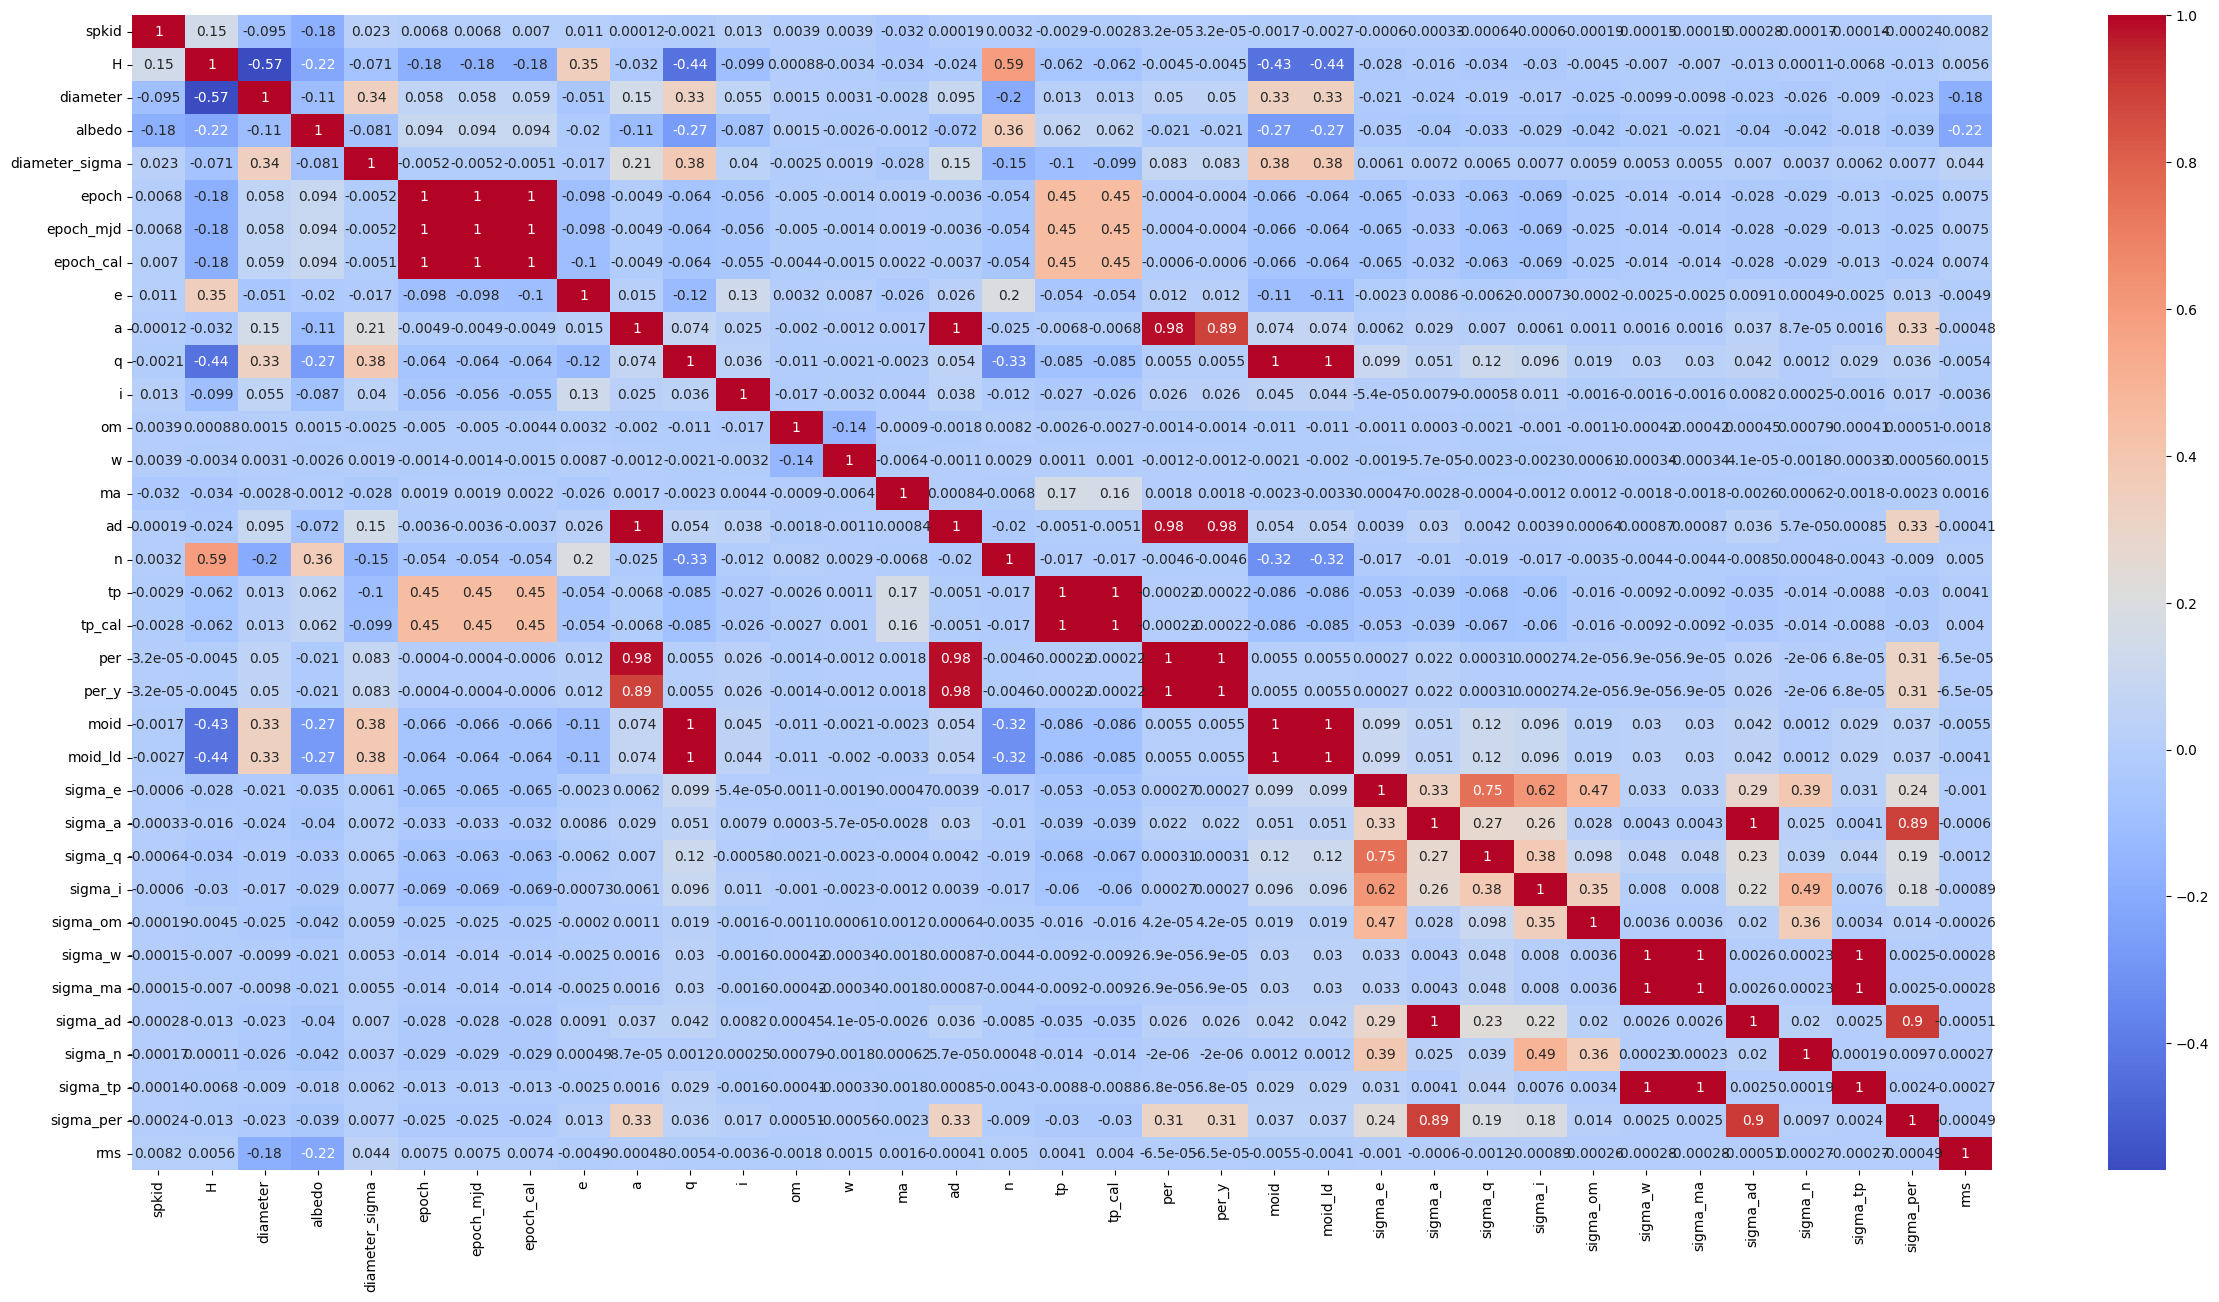

In [41]:
# Discovering the relation between the fetures and target (diameter)
nummeric_data = df.drop(df.select_dtypes(include=['object']).columns, axis=1)
plt.figure(figsize=(30,15))
sns.heatmap(nummeric_data.corr(), annot=True, cmap="coolwarm")

In [42]:
#droping the columns that isn't affect the target (diameter)
df=df.drop(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'orbit_id','epoch','equinox',
           'epoch_mjd', 'epoch_cal','i', 'om', 'w','ma','tp', 'tp_cal', 'per', 'per_y','sigma_e', 'sigma_a',
           'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w','sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per'],axis=1)

In [43]:
df.shape

(958524, 15)

In [44]:
df.columns

Index(['neo', 'pha', 'H', 'diameter', 'albedo', 'diameter_sigma', 'e', 'a',
       'q', 'ad', 'n', 'moid', 'moid_ld', 'class', 'rms'],
      dtype='object')

In [45]:
# Renaming columns
col_rename={
  'neo':'is_near' ,
   'pha':'is_hazardous',
   'H':'brightness',
   'albedo':'reflectivity',
   'diameter_sigma':'diameter_error',
    'e':'orbit_eccentricity',
    'a':'semi_major_axis',
    'q':'perihelion_dist',
    'ad':'aphelion_dist',
    'n':'orbital_speed',
}
df=df.rename(columns=col_rename)
df.head()


,is_near,is_hazardous,brightness,diameter,reflectivity,diameter_error,orbit_eccentricity,semi_major_axis,perihelion_dist,aphelion_dist,orbital_speed,moid,moid_ld,class,rms
0,N,N,3.40,939.400,0.0900,0.200,0.076009,2.769165,2.558684,2.979647,0.213885,1.59478,620.640533,MBA,0.43301
1,N,N,4.20,545.000,0.1010,18.000,0.229972,2.773841,2.135935,3.411748,0.213345,1.23429,480.348639,MBA,0.35936
2,N,N,5.33,246.596,0.2140,10.594,0.256936,2.668285,1.982706,3.353865,0.226129,1.03429,402.514639,MBA,0.33848
3,N,N,3.00,525.400,0.4228,0.200,0.088721,2.361418,2.151909,2.570926,0.271609,1.13948,443.451432,MBA,0.39980
4,N,N,6.90,106.699,0.2740,3.140,0.190913,2.574037,2.082619,3.065455,0.238661,1.09575,426.433027,MBA,0.52191


In [46]:
# Target variable summary
target_available = df['diameter'].notna().sum()
target_missing = df['diameter'].isna().sum()
missing_rate = (target_missing / len(df)) * 100

In [47]:
print(f"TARGET VARIABLE (diameter):")
print(f"Available: {target_available:,} ({100-missing_rate:.1f}%)")
print(f"Missing: {target_missing:,} ({missing_rate:.1f}%)")

TARGET VARIABLE (diameter):
Available: 136,209 (14.2%)
Missing: 822,315 (85.8%)


In [48]:
df = df.copy()
df['diameter']   = pd.to_numeric(df['diameter'], errors='coerce')
df['brightness'] = pd.to_numeric(df['brightness'], errors='coerce')
df['has_diameter'] = df['diameter'].notna()

In [49]:
# Missing data summary
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percent': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print("Missing Data Summary:")
print(missing_data.to_string(index=False))


Missing Data Summary:
        Column  Missing_Count  Missing_Percent Data_Type
  reflectivity         823421        85.905100   float64
diameter_error         822443        85.803068   float64
      diameter         822315        85.789714   float64
  is_hazardous          19921         2.078300    object
          moid          19921         2.078300   float64
    brightness           6263         0.653400   float64
       moid_ld            127         0.013250   float64
       is_near              4         0.000417    object
 aphelion_dist              4         0.000417   float64
           rms              2         0.000209   float64


brightness by diameter availability:                  count       mean       std  min   25%   50%   75%   max
has_diameter                                                            
False         820216.0  17.192019  1.680243 -1.1  16.4  17.1  17.9  33.2
True          132045.0  15.132319  1.387944  3.0  14.4  15.2  16.0  29.9


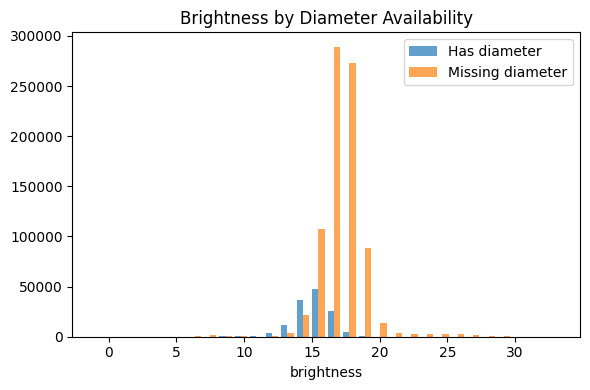

In [50]:
# Missing vs Available diameter distribution
has_diameter = df['diameter'].notna()

stats = (
    df.assign(has_diameter=has_diameter)
      .groupby('has_diameter')['brightness']
      .describe()
)
print("brightness by diameter availability:", stats)

fig, ax = plt.subplots(figsize=(6,4))
ax.hist(
    [df.loc[has_diameter, 'brightness'].dropna(),
     df.loc[~has_diameter, 'brightness'].dropna()],
    bins=30, alpha=0.7, label=['Has diameter', 'Missing diameter']
)
ax.set_title('Brightness by Diameter Availability')
ax.set_xlabel('brightness')
ax.legend()

plt.tight_layout()
plt.show()


In [51]:
# Diameter statistics
diameter_stats = df['diameter'].describe()
print("Diameter Statistics:")
print(diameter_stats)

Diameter Statistics:
count    136209.000000
mean          5.506429
std           9.425164
min           0.002500
25%           2.780000
50%           3.972000
75%           5.765000
max         939.400000
Name: diameter, dtype: float64


In [52]:
# Drop rows that have ANY null in ANY column
before = df.shape
df = df.dropna()
after = df.shape

print(f"Dropped {before[0] - after[0]} rows with nulls. Final shape: {after}")
df.reset_index(drop=True, inplace=True)

Dropped 827382 rows with nulls. Final shape: (131142, 16)


In [53]:
# Coerce to numeric
diam = pd.to_numeric(df['diameter'], errors='coerce')
has_brightness = 'brightness' in df.columns

if has_brightness:
    bright = pd.to_numeric(df['brightness'], errors='coerce')
    # Define mask once, in this cell
    mask = df['class'].notna() & diam.notna() & bright.notna()

    df_top_scatter = df.loc[mask, ['class']].copy()
    df_top_scatter['diameter'] = diam.loc[mask].values
    df_top_scatter['brightness'] = bright.loc[mask].values
else:
    mask = df['class'].notna() & diam.notna()

    df_top_scatter = df.loc[mask, ['class']].copy()
    df_top_scatter['diameter'] = diam.loc[mask].values
# --- 2) Choose top classes (by frequency among cleaned rows) ---
TOP_N = 10
top_classes = (
    df_top_scatter['class']
    .value_counts()
    .head(TOP_N)
    .index
)

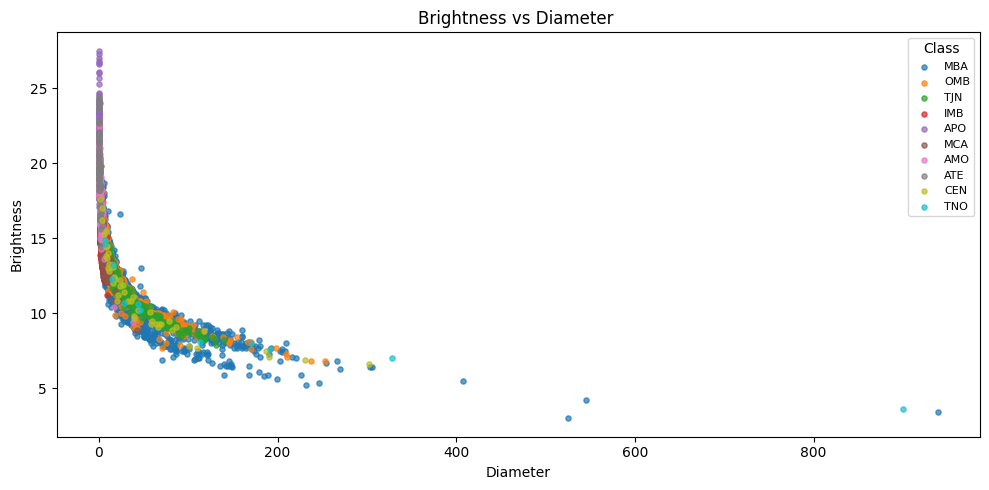

In [54]:
# optional brightness 
has_brightness = 'brightness' in df.columns
if has_brightness:
    bright = pd.to_numeric(df['brightness'], errors='coerce')
    df_top_scatter = df.loc[mask, ['class']].copy()
    df_top_scatter['diameter'] = diam.loc[mask]
    df_top_scatter['brightness'] = bright.loc[mask]
    df_top_scatter = df_top_scatter.dropna(subset=['diameter', 'brightness'])

# --- 3) Scatter: Brightness vs Diameter (Top 10 classes) ---
if has_brightness and not df_top_scatter.empty:
    fig, ax = plt.subplots(figsize=(10,5))
    for c in top_classes:
        sub = df_top_scatter[df_top_scatter['class'] == c]
        if not sub.empty:
            ax.scatter(sub['diameter'], sub['brightness'], s=14, alpha=0.7, label=str(c))
    ax.set_title('Brightness vs Diameter ')
    ax.set_xlabel('Diameter'); ax.set_ylabel('Brightness')
    ax.legend(title='Class', fontsize=8)
    fig.tight_layout();
    plt.show()
else:
    print("'brightness' column missing or no rows after cleaning.")


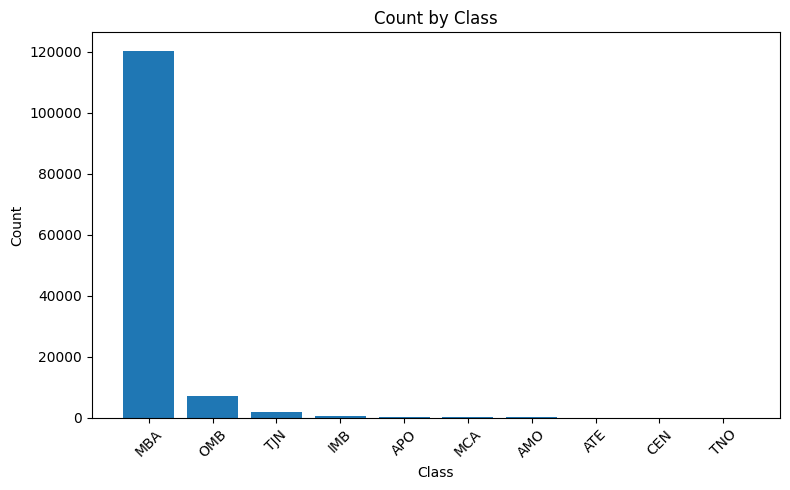

In [55]:
df_clean = df.loc[mask, ['class']].copy()
df_clean['diameter'] = diam.loc[mask].values
if has_brightness:
    df_clean['brightness'] = bright.loc[mask].values
# --- 2) Choose top classes (by frequency among cleaned rows) ---
TOP_N = 10
top_classes = df_clean['class'].value_counts().head(TOP_N).index
# --- 3) Define df_top as the subset you’ll reuse below ---
df_top = df_clean[df_clean['class'].isin(top_classes)].copy()
# Prepare data in the same order as top_classes
labels, data = [], []
for c in top_classes:
    vals = df_top.loc[df_top['class'] == c, 'diameter'].to_numpy()
    if vals.size:  # skip empty classes after filtering
        labels.append(c)
        data.append(vals)
# --- 4) Bar: counts per class (with diameter) ---
counts = df_top['class'].value_counts().reindex(labels, fill_value=0)
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(counts.index, counts.values)
ax.set_title('Count by Class')
ax.set_xlabel('Class'); ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)
fig.tight_layout();
plt.show()

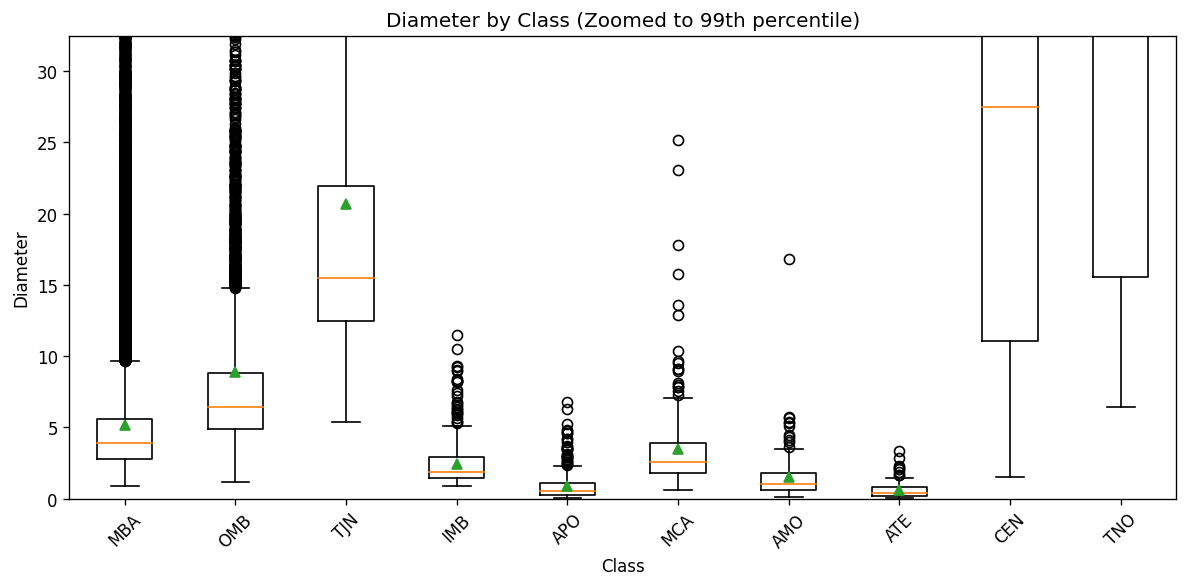

In [56]:
labels = list(top_classes)
data = [df_top.loc[df_top['class']==c, 'diameter'].to_numpy() for c in labels]

p99 = np.nanpercentile(np.concatenate(data), 99)

fig, ax = plt.subplots(figsize=(10,5), dpi=120)
ax.boxplot(data, labels=labels, showmeans=True)
ax.set_ylim(0, p99)  #zoom to 99%

ax.set_title('Diameter by Class (Zoomed to 99th percentile)')
ax.set_xlabel('Class'); ax.set_ylabel('Diameter')
ax.tick_params(axis='x', rotation=45)
fig.tight_layout(); plt.show()

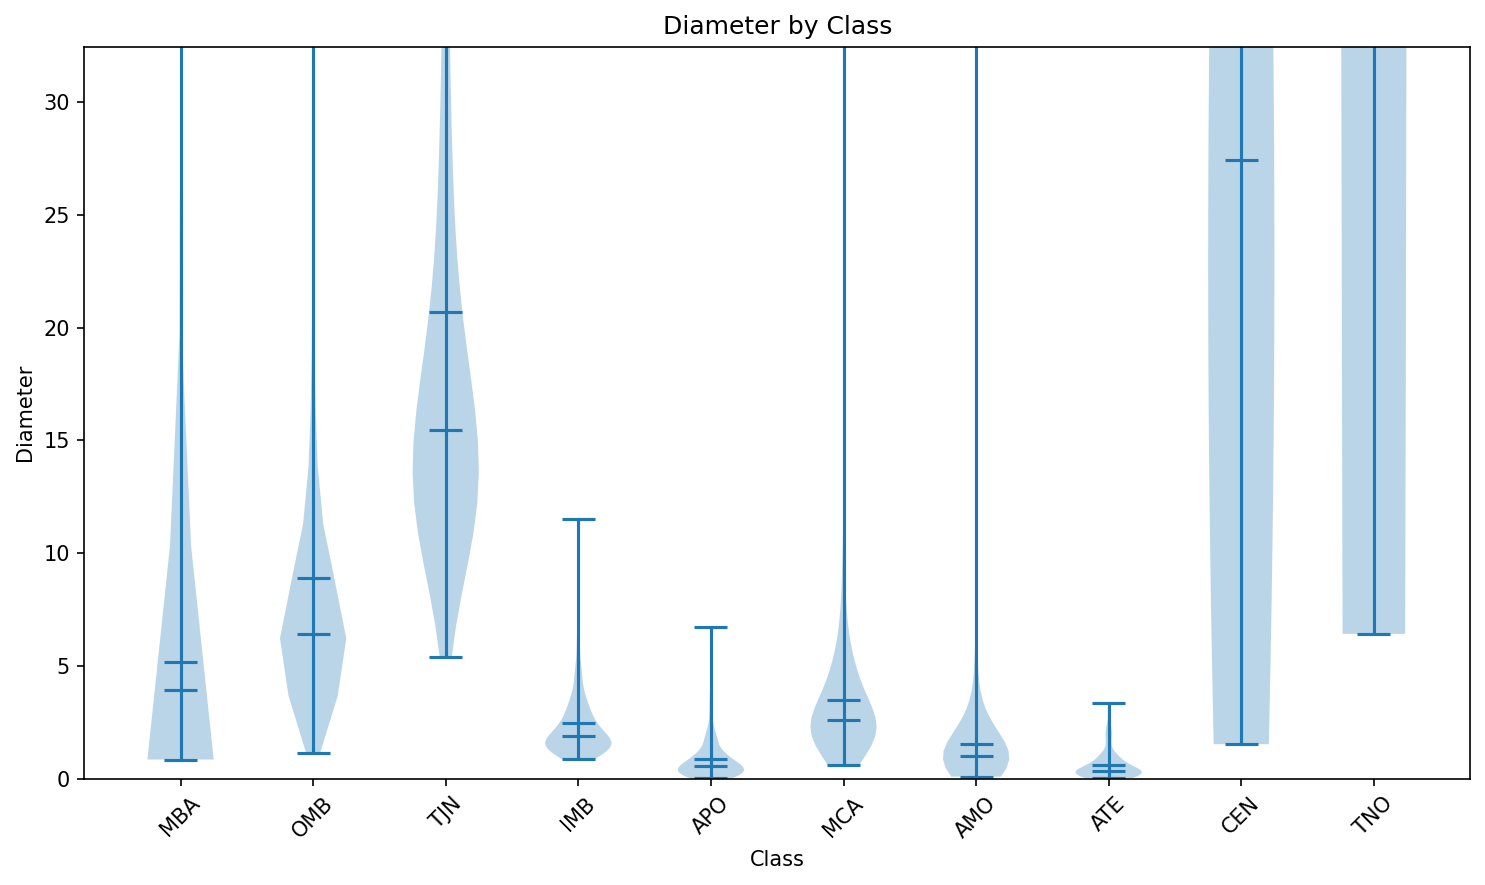

In [57]:
all_vals = np.concatenate([v for v in data if len(v)])
p99 = np.nanpercentile(all_vals, 99)

fig, ax = plt.subplots(figsize=(10, 6), dpi=150)
parts = ax.violinplot(data, showmeans=True, showmedians=True)

ax.set_ylim(0, p99)
ax.set_title('Diameter by Class')
ax.set_xlabel('Class'); ax.set_ylabel('Diameter')
ax.set_xticks(range(1, len(labels)+1)); ax.set_xticklabels(labels, rotation=45)

fig.tight_layout()
plt.show()


Numerical columns: 12

Strongest correlations with diameter:
diameter           1.000000
brightness         0.573182
diameter_error     0.338681
moid_ld            0.335001
moid               0.335001
perihelion_dist    0.332105
rms                0.223954
orbital_speed      0.201866
semi_major_axis    0.146328
reflectivity       0.115673
Name: diameter, dtype: float64


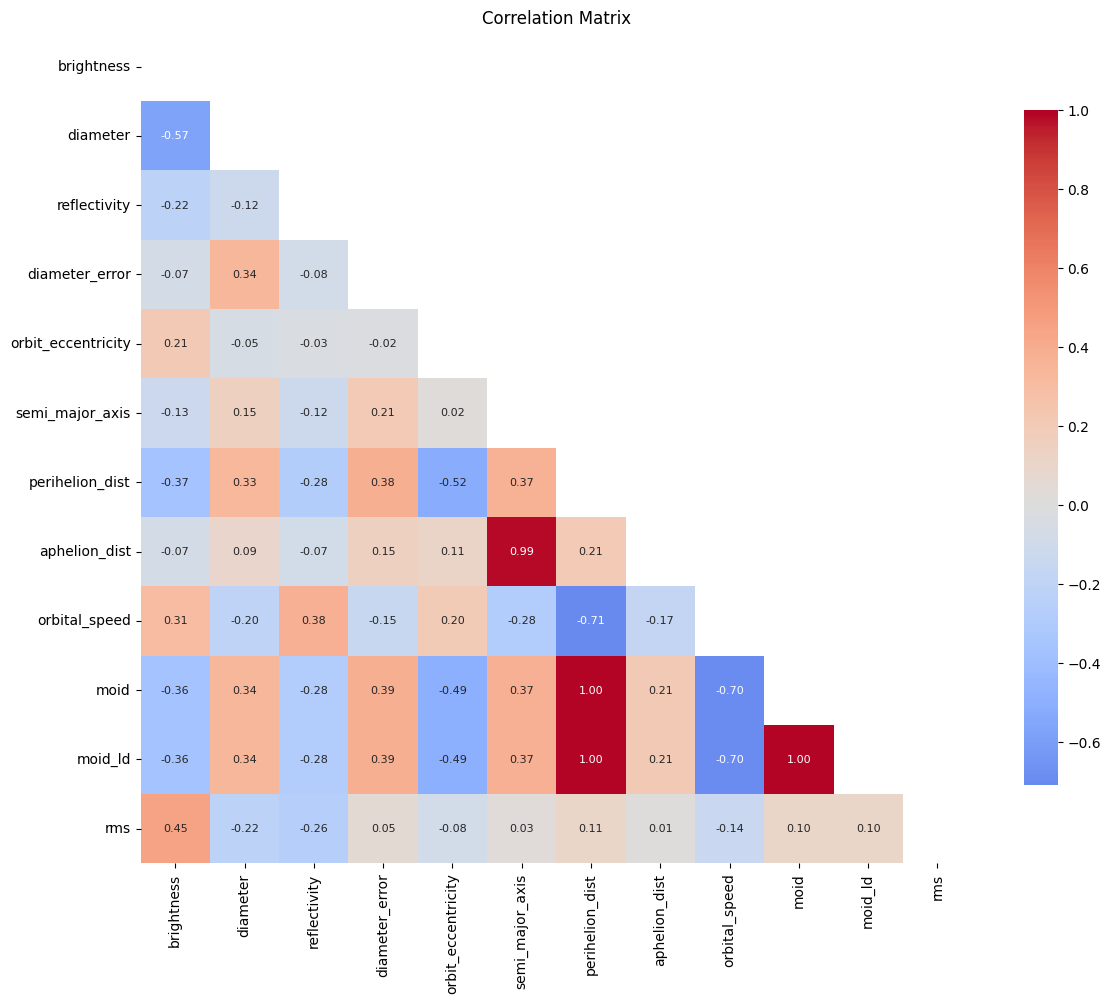

In [58]:
# Select numerical columns for correlation
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {len(numerical_cols)}")

# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

# Focus on diameter correlations
diameter_corr = corr_matrix['diameter'].dropna().abs().sort_values(ascending=False)
print("\nStrongest correlations with diameter:")
print(diameter_corr.head(10))

# Correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(corr_matrix.corr())
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
           square=True, fmt='.2f', cbar_kws={"shrink": .8},
           annot_kws={'size': 8}, mask=mask)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [59]:
#Outlier capping function
def cap_outliers(data, lower_pct=1, upper_pct=99):
    """Cap outliers using percentile method"""
    lower_bound = data.quantile(lower_pct/100)
    upper_bound = data.quantile(upper_pct/100)
    return np.clip(data, lower_bound, upper_bound)

# Create copy of dataframe
df_capped = df.copy()

print("CAPPING OUTLIERS...")

# Apply capping to each numerical column
for col in numerical_cols:
        original_count = len(df[col].dropna())
        
        # Cap outliers (1st to 99th percentile)
        df_capped[col] = cap_outliers(df[col], lower_pct=1, upper_pct=99)
        
        # Count how many values changed
        changes = (df[col] != df_capped[col]).sum()
        change_pct = (changes / original_count) * 100
        
        if changes > 0:
            print(f"{col}: {changes} values capped ({change_pct:.1f}%)")

print(f"Outlier capping complete!")
print(f"Original shape: {df.shape}")
print(f"Capped shape: {df_capped.shape}")
print(f"Use 'df_capped' for modeling")

CAPPING OUTLIERS...
brightness: 2352 values capped (1.8%)
diameter: 2619 values capped (2.0%)
reflectivity: 2418 values capped (1.8%)
diameter_error: 2595 values capped (2.0%)
orbit_eccentricity: 2624 values capped (2.0%)
semi_major_axis: 2624 values capped (2.0%)
perihelion_dist: 2624 values capped (2.0%)
aphelion_dist: 2624 values capped (2.0%)
orbital_speed: 2624 values capped (2.0%)
moid: 2624 values capped (2.0%)
moid_ld: 2624 values capped (2.0%)
rms: 2624 values capped (2.0%)
Outlier capping complete!
Original shape: (131142, 16)
Capped shape: (131142, 16)
Use 'df_capped' for modeling


In [60]:
print(df.dtypes)


is_near                object
is_hazardous           object
brightness            float64
diameter              float64
reflectivity          float64
diameter_error        float64
orbit_eccentricity    float64
semi_major_axis       float64
perihelion_dist       float64
aphelion_dist         float64
orbital_speed         float64
moid                  float64
moid_ld               float64
class                  object
rms                   float64
has_diameter             bool
dtype: object


In [61]:
from sklearn.preprocessing import LabelEncoder
# Create copy
df_encoded = df.copy()
# Encode categorical columns
categorical_cols = ['is_near', 'is_hazardous', 'class']

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    print(f"{col} encoded")

# Convert boolean to int
df_encoded['has_diameter'] = df_encoded['has_diameter'].astype(int)

print("Encoding complete!")
print(f"Shape: {df_encoded.shape}")
print(df_encoded.dtypes)

is_near encoded
is_hazardous encoded
class encoded
Encoding complete!
Shape: (131142, 16)
is_near                 int64
is_hazardous            int64
brightness            float64
diameter              float64
reflectivity          float64
diameter_error        float64
orbit_eccentricity    float64
semi_major_axis       float64
perihelion_dist       float64
aphelion_dist         float64
orbital_speed         float64
moid                  float64
moid_ld               float64
class                   int64
rms                   float64
has_diameter            int64
dtype: object


In [62]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Prepare data
target = 'diameter'
X = df_encoded.drop(['diameter', 'has_diameter'], axis=1)  # Remove target and leakage
y = df_encoded[target]
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# 0. Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# 3. (Linear, Ridge, Lasso)Regression
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)}
results = []
for name, model in models.items():
    # Use scaled data for linear models
    if name != 'Random Forest':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
     # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append({
        'Model': name,
        'R²': r2,
        'RMSE': rmse
    })
    
    print(f"{name:18s}: R² = {r2:.3f}, RMSE = {rmse:.3f}")


Linear Regression : R² = 0.391, RMSE = 8.206
Ridge Regression  : R² = 0.391, RMSE = 8.206
Lasso Regression  : R² = 0.388, RMSE = 8.225


In [64]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# 1. RANDOM FOREST 
print(f"RANDOM FOREST")
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print(f"R²: {rf_r2:.3f}")
print(f"RMSE: {rf_rmse:.3f}")


RANDOM FOREST
R²: 0.927
RMSE: 2.836


In [65]:
import xgboost as xgb
# 2. XGBOOST
print(f"XGBOOST")
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
print(f"R²: {xgb_r2:.3f}")
print(f"RMSE: {xgb_rmse:.3f}")

XGBOOST
R²: 0.642
RMSE: 6.296


In [66]:
from catboost import CatBoostRegressor, Pool
# 3. CatBoostRegressor
print(f"CatBoostRegressor")
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)
# Pools
train_pool = Pool(X_tr, y_tr, cat_features=categorical_cols)
valid_pool = Pool(X_val, y_val, cat_features=categorical_cols)
test_pool  = Pool(X_test,cat_features=categorical_cols)
cbr = CatBoostRegressor(
    loss_function="RMSE", eval_metric="RMSE",
    iterations=20000, learning_rate=0.03, depth=8,
    l2_leaf_reg=3.0, subsample=0.8, rsm=0.8,
    random_seed=42, verbose=False
)
cbr.fit(train_pool, eval_set=valid_pool, use_best_model=True, early_stopping_rounds=400, verbose=False)

pred = cbr.predict(test_pool)
print(f"R²: {r2_score(y_test, pred):.4f} | RMSE: {np.sqrt(mean_squared_error(y_test, pred)):.4f} | MAE: {mean_absolute_error(y_test, pred):.4f}")


CatBoostRegressor
R²: 0.9215 | RMSE: 2.9474 | MAE: 0.4277


In [67]:
# 4. lightgbm
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import lightgbm as lgb
print(f"lightgbm")
# ColumnTransformer 
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
pre = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("imp", SimpleImputer(strategy="median"))]), num_cols),
        ("cat", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore", sparse=True)
        )]),categorical_cols),
    ],
    remainder="drop",
    sparse_threshold=1.0
)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# fit على train فقط ثم transform
pre.fit(X_tr, y_tr)
X_tr_p  = pre.transform(X_tr)
X_val_p = pre.transform(X_val)
X_te_p  = pre.transform(X_test)
lgbm = lgb.LGBMRegressor(
    n_estimators=20000,
    learning_rate=0.03,
    num_leaves=256,
    max_depth=-1,
    min_child_samples=20,
    subsample=0.8,         # bagging
    colsample_bytree=0.8,  # feature fraction
    reg_alpha=0.0,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

lgbm.fit(
    X_tr_p, y_tr,
    eval_set=[(X_val_p, y_val)],
    callbacks=[lgb.early_stopping(stopping_rounds=500), lgb.log_evaluation(0)]
)

pred = lgbm.predict(X_te_p)
rmse = np.sqrt(mean_squared_error(y_test, pred)); mae = mean_absolute_error(y_test, pred)
print(f"LGBM R²: {r2_score(y_test, pred):.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f}")


lightgbm
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2758
[LightGBM] [Info] Number of data points in the train set: 83930, number of used features: 27
[LightGBM] [Info] Start training from score 5.560083
Training until validation scores don't improve for 500 rounds
Early stopping, best iteration is:
[206]	valid_0's l2: 2.09552
LGBM R²: 0.8203 | RMSE: 4.4587 | MAE: 0.4854
